# Stock Price Prediction of UPPER

## Import the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from keras import Sequential
from keras.layers import GRU, LSTM, SimpleRNN,  Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2022-07-30 05:07:22.955277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-30 05:07:22.955316: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load Data

In [3]:
upper_df = pd.read_csv("data/UPPER.csv")
upper_df.shape

(661, 8)

In [4]:
upper_df.head()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,1,2021-12-29,412,57495.0,35461484.7,633.0,612.0,618.0
1,2,2021-12-28,624,64439.0,39617082.6,625.0,606.0,624.0
2,3,2021-12-27,759,125794.0,79522847.0,650.0,616.1,617.0
3,4,2021-12-26,797,145788.0,93525227.6,650.0,630.0,642.0
4,5,2021-12-23,1113,151904.0,98281767.0,675.0,636.0,637.0


## Renaming the Columns 

In [5]:
upper_df.columns = ['SN', 'Date', 'TTrans', 'TTS','TTA', 'MaxPrice', 'MinPrice', 'ClosePrice']

In [6]:
upper_df.head()

,SN,Date,TTrans,TTS,TTA,MaxPrice,MinPrice,ClosePrice
0,1,2021-12-29,412,57495.0,35461484.7,633.0,612.0,618.0
1,2,2021-12-28,624,64439.0,39617082.6,625.0,606.0,624.0
2,3,2021-12-27,759,125794.0,79522847.0,650.0,616.1,617.0
3,4,2021-12-26,797,145788.0,93525227.6,650.0,630.0,642.0
4,5,2021-12-23,1113,151904.0,98281767.0,675.0,636.0,637.0


In [7]:
upper_df.shape

(661, 8)

Converting the Date into Panda's Date Time 

In [8]:
upper_df['Date'] = pd.to_datetime(upper_df['Date'])

## Sorting the Date by Date in Ascending Order

In [9]:
upper_df=upper_df.sort_values(by='Date')

## Setting Features and Target Column

In [10]:
features = ['Date','ClosePrice']

In [11]:
X = upper_df[features]

In [12]:
X.set_index("Date",inplace=True)

## Splitting the Data Into Training, Validation and Test Set

In [13]:
X_train_split, X_test_split = train_test_split(X, train_size=0.8,shuffle=False)
X_test_split, X_valid_split = train_test_split(X_test_split, train_size=0.5,shuffle=False)

## Fucntion to slice data to Predict next day’s closing price by looking into previous 5 day’s data

In [14]:
def SliceData(data,step):     
    X,Y = [],[]
    for i in range(len(data)-step):
        X.append(data[i:(i+step),])
        Y.append(data[(i+step),])
    return np.array(X),np.array(Y)

## Normalizing the Data Using Standard Scalar

In [15]:
std_scalar = StandardScaler()
X_train = std_scalar.fit_transform(X_train_split)
X_valid = std_scalar.fit_transform(X_valid_split)
X_test = std_scalar.fit_transform(X_test_split)

## Getting the Sliced Data

In [16]:
steps = 5
X_train,y_train = SliceData(X_train,steps)
X_test,y_test = SliceData(X_test,steps)
X_valid,y_valid = SliceData(X_valid,steps)

## Building the RNN Model

In [17]:
RNN_Model = Sequential()
RNN_Model.add(SimpleRNN(50,input_shape=(steps,1),return_sequences=True ))
RNN_Model.add(Dropout(0.5))
RNN_Model.add(SimpleRNN(50))
RNN_Model.add(Dropout(0.5))
RNN_Model.add(Dense(50))
RNN_Model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

2022-07-30 05:08:02.197798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-30 05:08:02.197876: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-30 05:08:02.197916: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (xenon-Inspiron-3442): /proc/driver/nvidia/version does not exist
2022-07-30 05:08:02.198324: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
RNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 50)             2600      
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
Total params: 10,200
Trainable params: 10,200
Non-trainable params: 0
_________________________________________________________________


## Building LSTM Model

In [19]:
LSTM_Model = Sequential()
LSTM_Model.add(LSTM(50,input_shape=(steps,1),return_sequences=True ))
LSTM_Model.add(Dropout(0.5))
LSTM_Model.add(LSTM(50))
LSTM_Model.add(Dropout(0.5))
LSTM_Model.add(Dense(50))
LSTM_Model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [20]:
LSTM_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 dropout_2 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
Total params: 33,150
Trainable params: 33,150
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN Model

In [21]:
RNN_History = RNN_Model.fit(X_train,y_train,epochs=100,batch_size = 50,validation_data=(X_valid,y_valid),shuffle=False, 
                    verbose = 2)

Epoch 1/100
11/11 - 2s - loss: 1.0581 - mae: 0.7296 - val_loss: 0.8030 - val_mae: 0.7116 - 2s/epoch - 194ms/step
Epoch 2/100
11/11 - 0s - loss: 0.7770 - mae: 0.5907 - val_loss: 0.7831 - val_mae: 0.7048 - 102ms/epoch - 9ms/step
Epoch 3/100
11/11 - 0s - loss: 0.5997 - mae: 0.5100 - val_loss: 0.8085 - val_mae: 0.7212 - 91ms/epoch - 8ms/step
Epoch 4/100
11/11 - 0s - loss: 0.5247 - mae: 0.4738 - val_loss: 0.8471 - val_mae: 0.7474 - 93ms/epoch - 8ms/step
Epoch 5/100
11/11 - 0s - loss: 0.4536 - mae: 0.4396 - val_loss: 0.8658 - val_mae: 0.7632 - 96ms/epoch - 9ms/step
Epoch 6/100
11/11 - 0s - loss: 0.3882 - mae: 0.4132 - val_loss: 0.8800 - val_mae: 0.7723 - 89ms/epoch - 8ms/step
Epoch 7/100
11/11 - 0s - loss: 0.3468 - mae: 0.3891 - val_loss: 0.8360 - val_mae: 0.7549 - 89ms/epoch - 8ms/step
Epoch 8/100
11/11 - 0s - loss: 0.3001 - mae: 0.3619 - val_loss: 0.8284 - val_mae: 0.7521 - 90ms/epoch - 8ms/step
Epoch 9/100
11/11 - 0s - loss: 0.2959 - mae: 0.3563 - val_loss: 0.8273 - val_mae: 0.7552 - 84ms

Epoch 73/100
11/11 - 0s - loss: 0.0671 - mae: 0.1655 - val_loss: 0.3409 - val_mae: 0.4708 - 116ms/epoch - 11ms/step
Epoch 74/100
11/11 - 0s - loss: 0.0660 - mae: 0.1693 - val_loss: 0.3501 - val_mae: 0.4748 - 105ms/epoch - 10ms/step
Epoch 75/100
11/11 - 0s - loss: 0.0656 - mae: 0.1623 - val_loss: 0.3305 - val_mae: 0.4583 - 105ms/epoch - 10ms/step
Epoch 76/100
11/11 - 0s - loss: 0.0713 - mae: 0.1673 - val_loss: 0.3496 - val_mae: 0.4726 - 126ms/epoch - 11ms/step
Epoch 77/100
11/11 - 0s - loss: 0.0640 - mae: 0.1630 - val_loss: 0.3164 - val_mae: 0.4438 - 116ms/epoch - 11ms/step
Epoch 78/100
11/11 - 0s - loss: 0.0575 - mae: 0.1605 - val_loss: 0.3570 - val_mae: 0.4759 - 106ms/epoch - 10ms/step
Epoch 79/100
11/11 - 0s - loss: 0.0629 - mae: 0.1600 - val_loss: 0.3254 - val_mae: 0.4536 - 102ms/epoch - 9ms/step
Epoch 80/100
11/11 - 0s - loss: 0.0613 - mae: 0.1630 - val_loss: 0.3580 - val_mae: 0.4808 - 115ms/epoch - 10ms/step
Epoch 81/100
11/11 - 0s - loss: 0.0693 - mae: 0.1648 - val_loss: 0.3145 -

In [22]:
LSTM_History = LSTM_Model.fit(X_train,y_train,epochs=100,batch_size = 50,validation_data=(X_valid,y_valid),shuffle=False, 
                    verbose = 2)

Epoch 1/100
11/11 - 5s - loss: 0.9745 - mae: 0.7424 - val_loss: 0.8045 - val_mae: 0.7187 - 5s/epoch - 438ms/step
Epoch 2/100
11/11 - 0s - loss: 0.8979 - mae: 0.7042 - val_loss: 0.7719 - val_mae: 0.6990 - 134ms/epoch - 12ms/step
Epoch 3/100
11/11 - 0s - loss: 0.7660 - mae: 0.6468 - val_loss: 0.7220 - val_mae: 0.6646 - 131ms/epoch - 12ms/step
Epoch 4/100
11/11 - 0s - loss: 0.5519 - mae: 0.5347 - val_loss: 0.6877 - val_mae: 0.6438 - 133ms/epoch - 12ms/step
Epoch 5/100
11/11 - 0s - loss: 0.3475 - mae: 0.3901 - val_loss: 0.7907 - val_mae: 0.7140 - 146ms/epoch - 13ms/step
Epoch 6/100
11/11 - 0s - loss: 0.2454 - mae: 0.3166 - val_loss: 0.9823 - val_mae: 0.8088 - 142ms/epoch - 13ms/step
Epoch 7/100
11/11 - 0s - loss: 0.1991 - mae: 0.2853 - val_loss: 0.9741 - val_mae: 0.8095 - 139ms/epoch - 13ms/step
Epoch 8/100
11/11 - 0s - loss: 0.1639 - mae: 0.2598 - val_loss: 0.8834 - val_mae: 0.7691 - 128ms/epoch - 12ms/step
Epoch 9/100
11/11 - 0s - loss: 0.1558 - mae: 0.2479 - val_loss: 0.8234 - val_mae: 

Epoch 72/100
11/11 - 0s - loss: 0.0553 - mae: 0.1520 - val_loss: 0.8945 - val_mae: 0.7879 - 261ms/epoch - 24ms/step
Epoch 73/100
11/11 - 0s - loss: 0.0480 - mae: 0.1418 - val_loss: 0.7587 - val_mae: 0.7124 - 125ms/epoch - 11ms/step
Epoch 74/100
11/11 - 0s - loss: 0.0519 - mae: 0.1448 - val_loss: 0.8144 - val_mae: 0.7441 - 118ms/epoch - 11ms/step
Epoch 75/100
11/11 - 0s - loss: 0.0480 - mae: 0.1413 - val_loss: 0.8081 - val_mae: 0.7414 - 143ms/epoch - 13ms/step
Epoch 76/100
11/11 - 0s - loss: 0.0574 - mae: 0.1476 - val_loss: 0.7644 - val_mae: 0.7164 - 203ms/epoch - 18ms/step
Epoch 77/100
11/11 - 0s - loss: 0.0520 - mae: 0.1461 - val_loss: 0.7901 - val_mae: 0.7315 - 127ms/epoch - 12ms/step
Epoch 78/100
11/11 - 0s - loss: 0.0491 - mae: 0.1439 - val_loss: 0.7616 - val_mae: 0.7143 - 125ms/epoch - 11ms/step
Epoch 79/100
11/11 - 0s - loss: 0.0538 - mae: 0.1475 - val_loss: 0.7891 - val_mae: 0.7301 - 168ms/epoch - 15ms/step
Epoch 80/100
11/11 - 0s - loss: 0.0471 - mae: 0.1400 - val_loss: 0.8415 

## Make Predictions

In [23]:
RNN_Predictions = RNN_Model.predict(X_test)
LSTM_predictions = LSTM_Model.predict(X_test)

## Inverse Transform the Values

In [24]:
RNN_act_prd = std_scalar.inverse_transform(RNN_Predictions)
LSTM_act_prd = std_scalar.inverse_transform(LSTM_predictions)

## Evalation Metrics (RMSE and MAE)

In [25]:
print("### RNN Model ###")
Y_test_res_RNN = std_scalar.inverse_transform(y_test)
pre_RNN = RNN_act_prd[:,:1]

rmse=np.sqrt(np.mean(((pre_RNN- Y_test_res_RNN)**2)))
print(f"RMSE {rmse}"  )

print(f"MAE {mean_absolute_error(Y_test_res_RNN, pre_RNN)}")

### RNN Model ###
RMSE 28.728600151721597
MAE 21.959531690253588


In [26]:
print("### LSTM Model ###")
Y_test_res_LSTM = std_scalar.inverse_transform(y_test)
pre_LSTM = LSTM_act_prd[:,:1]

rmse=np.sqrt(np.mean(((pre_LSTM- Y_test_res_LSTM)**2)))
print(f"RMSE {rmse}"  )

print(f"MAE {mean_absolute_error(Y_test_res_LSTM, pre_LSTM)}")

### LSTM Model ###
RMSE 49.389150590109686
MAE 39.67274450083248


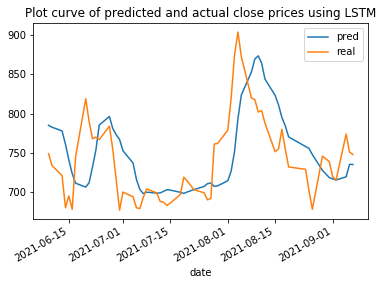

In [27]:
plot =pd.DataFrame()
plot["pred"]=list(map(float, pre_LSTM))
plot["real"]=list(map(float, Y_test_res_LSTM))
plot["date"]=X_test_split.index[:-steps]
plot.plot(kind="line", x="date", title="Plot curve of predicted and actual close prices using LSTM")
plt.show()

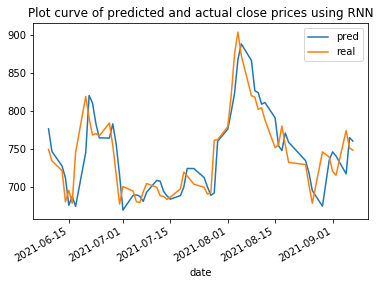

In [28]:
plot =pd.DataFrame()
plot["pred"]=list(map(float, pre_RNN))
plot["real"]=list(map(float, Y_test_res_RNN))
plot["date"]=X_test_split.index[:-steps]
plot.plot(kind="line", x="date", title="Plot curve of predicted and actual close prices using RNN")
plt.show()

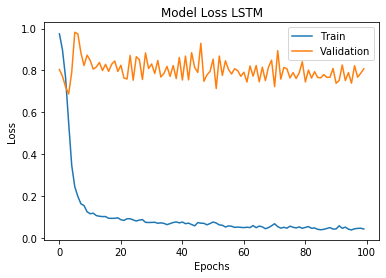

In [29]:
plt.plot(LSTM_History.history['loss'])
plt.plot(LSTM_History.history['val_loss'])
plt.title('Model Loss LSTM')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

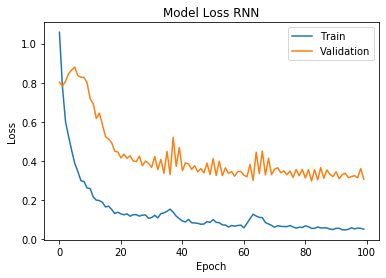

In [30]:
plt.plot(RNN_History.history['loss'])
plt.plot(RNN_History.history['val_loss'])
plt.title('Model Loss RNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

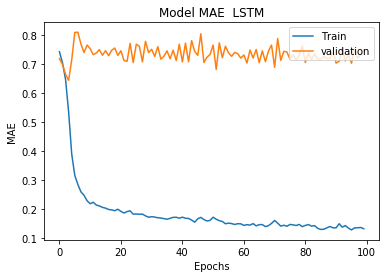

In [31]:
plt.plot(LSTM_History.history['mae'])
plt.plot(LSTM_History.history['val_mae'])
plt.title('Model MAE  LSTM')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show()

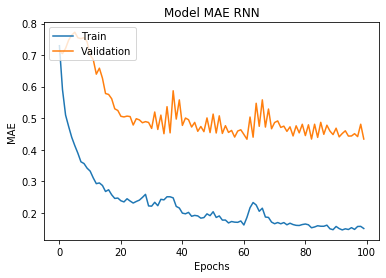

In [32]:
plt.plot(RNN_History.history['mae'])
plt.plot(RNN_History.history['val_mae'])
plt.title('Model MAE RNN')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Conclusion

1. For UPPER LSTM and RNN Models used for Stock Price Prediction
2. The Error is Low for RNN Model